# Tesla Stocks Prediction

# Importing Libraries & data set reading

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from scipy.stats import norm,chi2_contingency,pearsonr

In [3]:
df=pd.read_csv('tsla.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


# Checking the Null & Duplicate Values For Data Cleaning

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.duplicated().sum()

0

# Data Preprocessing

In [5]:
df['Year']=df.Date.apply(lambda x:x.split('-')[0])
df['Month']=df.Date.apply(lambda x:x.split('-')[1])
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010,06
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010,06
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010,07
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010,07
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010,07
...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022,03
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022,03
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022,03
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,2022,03


In [6]:
Profit=df['Open']-df["Close"]
Profit=Profit.tolist()
df["Profit"]=Profit
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Profit
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010,06,-0.978000
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010,06,0.392000
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010,07,0.608000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010,07,0.760000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010,07,0.778000
...,...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022,03,-30.900025
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022,03,-6.179993
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022,03,-63.979980
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,2022,03,-19.169983


# Data Exploration

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Profit
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03,2956.000000
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07,-0.070887
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07,9.708050
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05,-100.380005
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07,-0.566496
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07,0.004000
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07,0.539002
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08,150.099976


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
 7   Year       2956 non-null   object 
 8   Month      2956 non-null   object 
 9   Profit     2956 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 231.1+ KB


In [10]:
df.nunique()

Date         2956
Open         2666
High         2662
Low          2672
Close        2764
Adj Close    2764
Volume       2925
Year           13
Month          12
Profit       2450
dtype: int64

# Univariate Analysis

In [11]:
df.groupby('Month').sum()

,Open,High,Low,Close,Adj Close,Volume,Profit
Month,,,,,,,
01,44639.652013,45706.457981,43386.997976,44527.205857,44527.205857,7562868100,112.446156
02,40928.276061,41950.894057,39812.980072,40891.485929,40891.485929,7951553800,36.790132
03,40125.923912,41204.143876,38889.338031,40104.141784,40104.141784,8283058100,21.782128
04,24432.886062,24954.903873,23913.815971,24443.860007,24443.860007,7945251200,-10.973945
05,22530.363849,22966.883934,22042.116101,22494.476052,22494.476052,8534811800,35.887797
06,25518.260042,25998.891916,25107.414037,25567.180070,25567.180070,7827674900,-48.920028
07,27913.818036,28494.246040,27246.434040,27875.339909,27875.339909,8157277300,38.478127
08,31187.815994,31820.116184,30685.898135,31329.839739,31329.839739,7771190300,-142.023745
09,31998.986078,32615.731848,31284.781970,32021.460046,32021.460046,6964980100,-22.473968


In [12]:
df.groupby('Year').sum()

,Open,High,Low,Close,Adj Close,Volume,Profit
Year,,,,,,,
2010,608.608000,626.008000,588.798000,606.888000,606.888000,1026845500,1.720000
2011,1351.828000,1379.964000,1320.186000,1350.960000,1350.960000,1626175500,0.868000
2012,1560.156000,1590.458000,1527.294000,1558.430000,1558.430000,1537245000,1.726000
2013,5262.587992,5385.392005,5129.706001,5261.822003,5261.822003,10593729500,0.765989
2014,11260.135974,11463.474024,11047.988031,11255.785988,11255.785988,8711606500,4.349986
2015,11583.530034,11762.436003,11404.040014,11594.162038,11594.162038,5441089000,-10.632004
2016,10586.945990,10757.048024,10396.821988,10572.270021,10572.270021,5811808500,14.675969
2017,15777.669988,15986.219974,15546.285994,15778.678005,15778.678005,7950157000,-1.008017
2018,15922.610065,16249.419975,15589.725993,15928.957984,15928.957984,10808194000,-6.347919


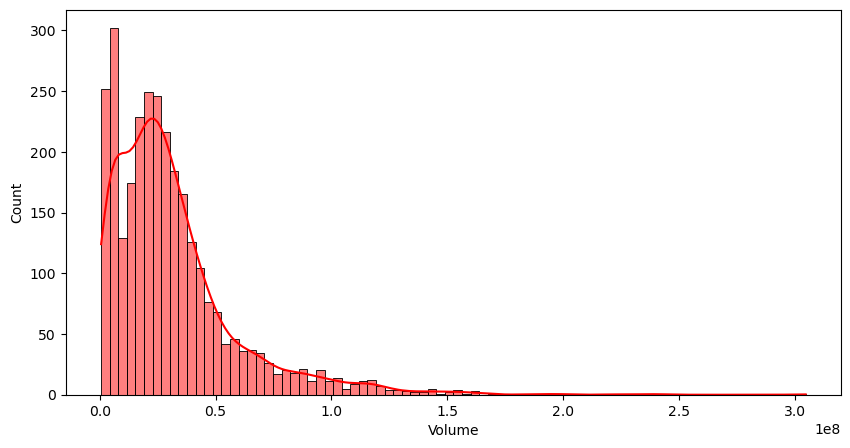

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['Volume'],kde=True,color='r')
plt.show()

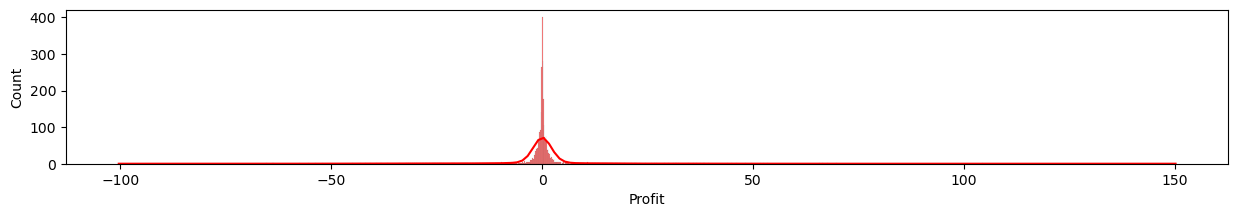

In [17]:
plt.figure(figsize=(15,2))
sns.histplot(df['Profit'],kde=True,color='r')
plt.show()

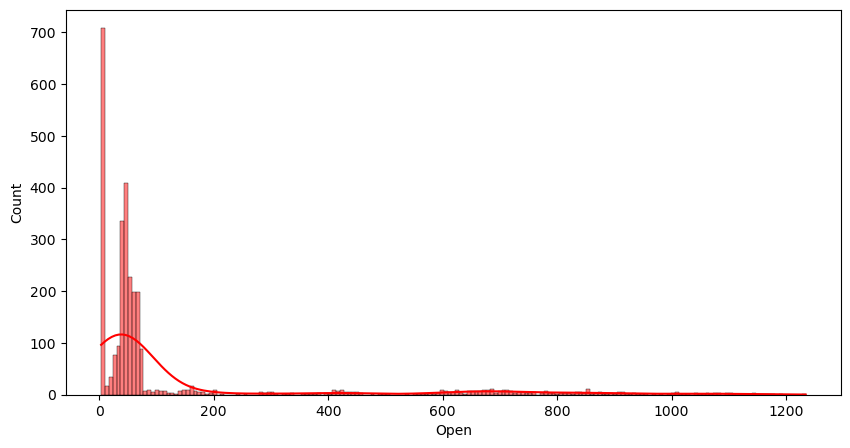

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Open'],kde=True,color='r')
plt.show()

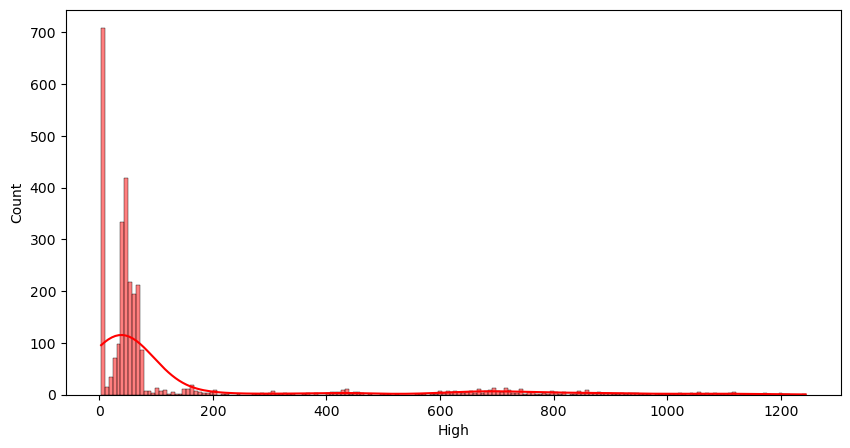

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(df['High'],kde=True,color='r')
plt.show()

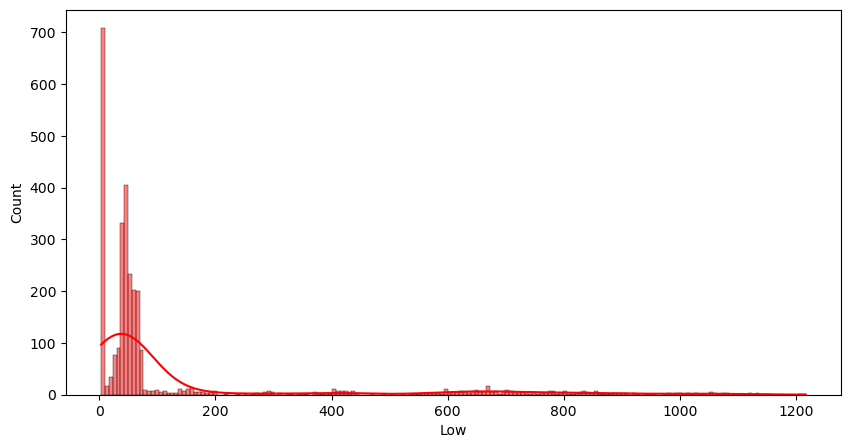

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df['Low'],kde=True,color='r')
plt.show()

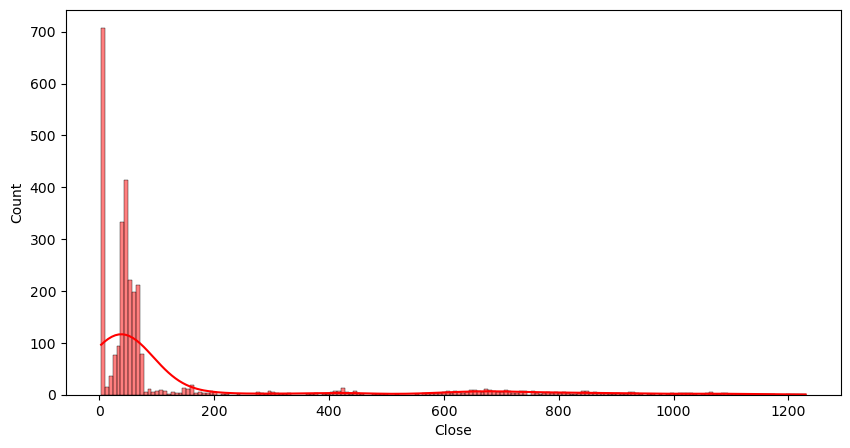

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df['Close'],kde=True,color='r')
plt.show()

# Bivariate Analysis

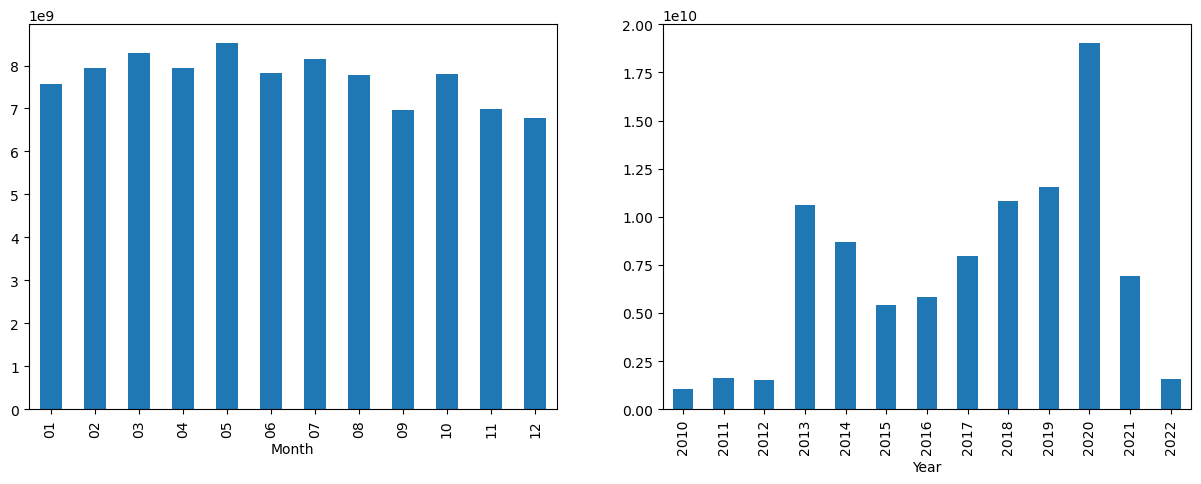

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df.groupby('Month').sum()['Volume'].plot(kind='bar',ax=ax[0])
df.groupby('Year').sum()['Volume'].plot(kind='bar',ax=ax[1])
plt.show()

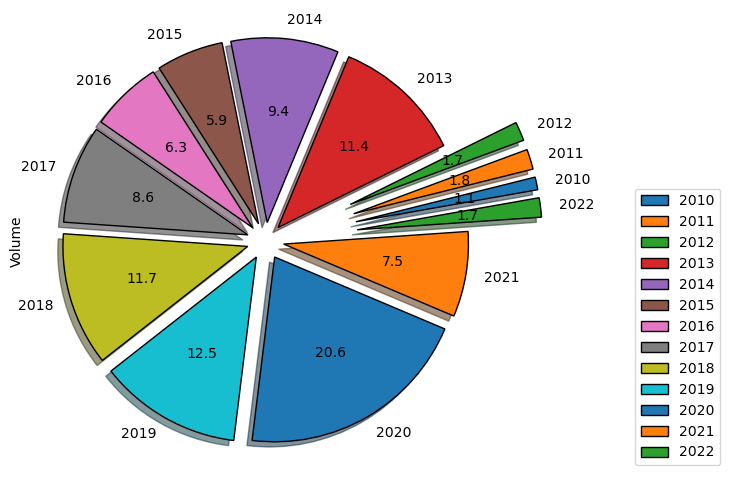

In [65]:
data=df.groupby('Year').sum()["Volume"]
explode=(0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.5)
data.plot.pie(figsize=(6,6),autopct="%.01f",explode=explode,startangle=10,
              wedgeprops= {"edgecolor":"black",'linewidth': 1,'antialiased': True},shadow=True)
plt.legend(loc="lower right",bbox_to_anchor=(1,0,0.5,1))
plt.show()

In [12]:
((20.6-7.5)/20.6)*100

63.59223300970874

In [13]:
((7.5-1.7)/7.5)*100

77.33333333333333

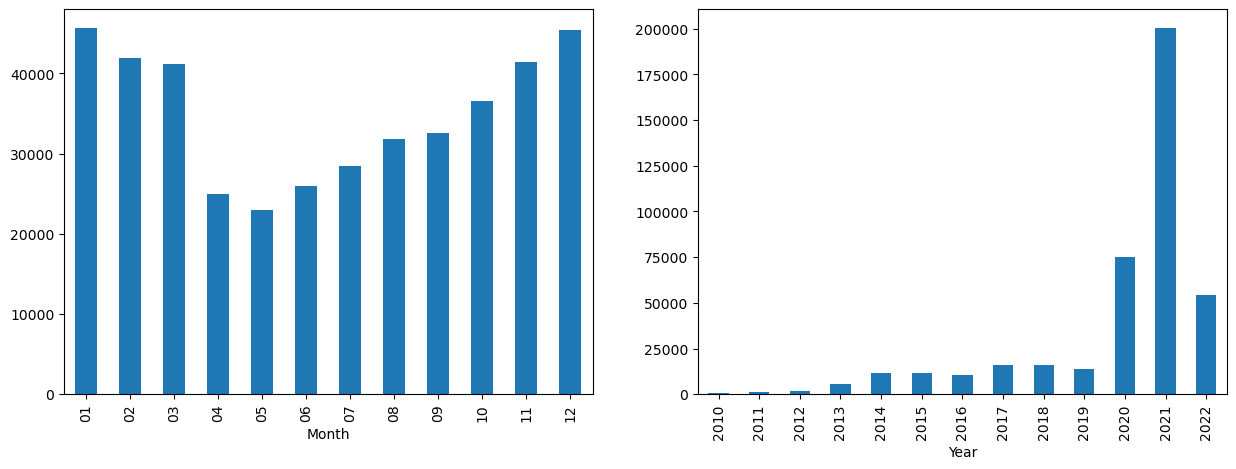

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df.groupby('Month').sum()['High'].plot(kind="bar",ax=ax[0])
df.groupby('Year').sum()['High'].plot(kind="bar",ax=ax[1])
plt.show()

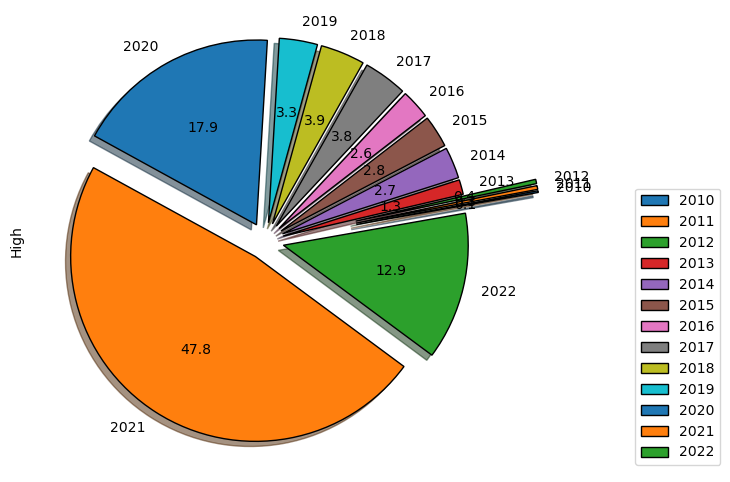

In [92]:
data=df.groupby('Year').sum()["High"]
explode=(0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
data.plot.pie(figsize=(6,6),autopct="%.01f",explode=explode,startangle=10,
              wedgeprops= {"edgecolor":"black",'linewidth': 1,'antialiased': True},shadow=True)
plt.legend(loc="lower right",bbox_to_anchor=(1,0,0.5,1))
plt.show()

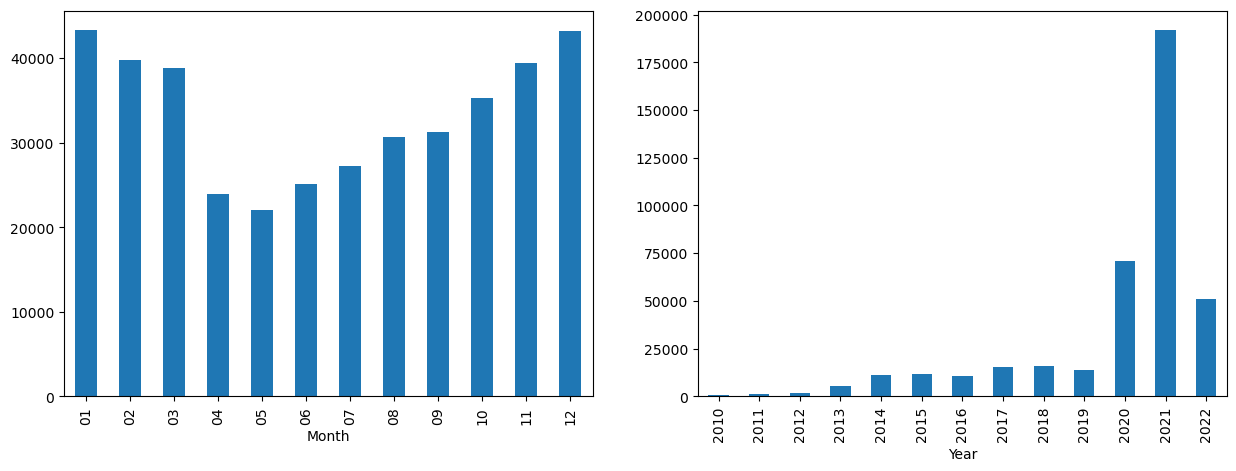

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df.groupby('Month').sum()['Low'].plot(kind="bar",ax=ax[0])
df.groupby('Year').sum()['Low'].plot(kind="bar",ax=ax[1])
plt.show()

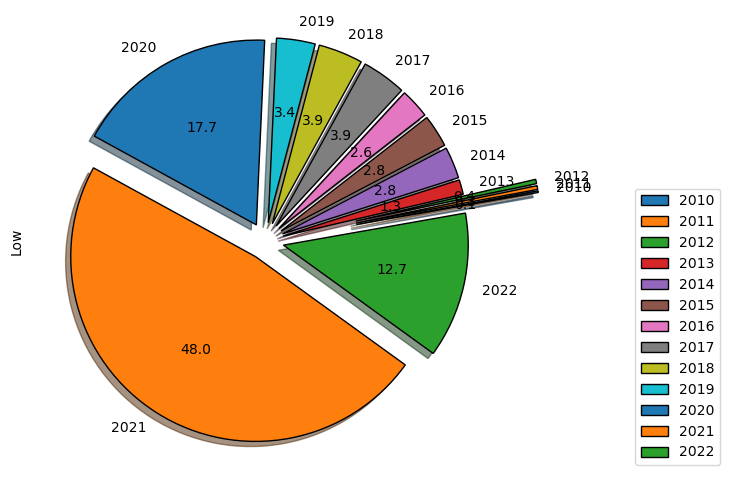

In [91]:
data=df.groupby('Year').sum()["Low"]
explode=(0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
data.plot.pie(figsize=(6,6),autopct="%.01f",explode=explode,startangle=10,
              wedgeprops= {"edgecolor":"black",'linewidth': 1,'antialiased': True},shadow=True)
plt.legend(loc="lower right",bbox_to_anchor=(1,0,0.5,1))
plt.show()

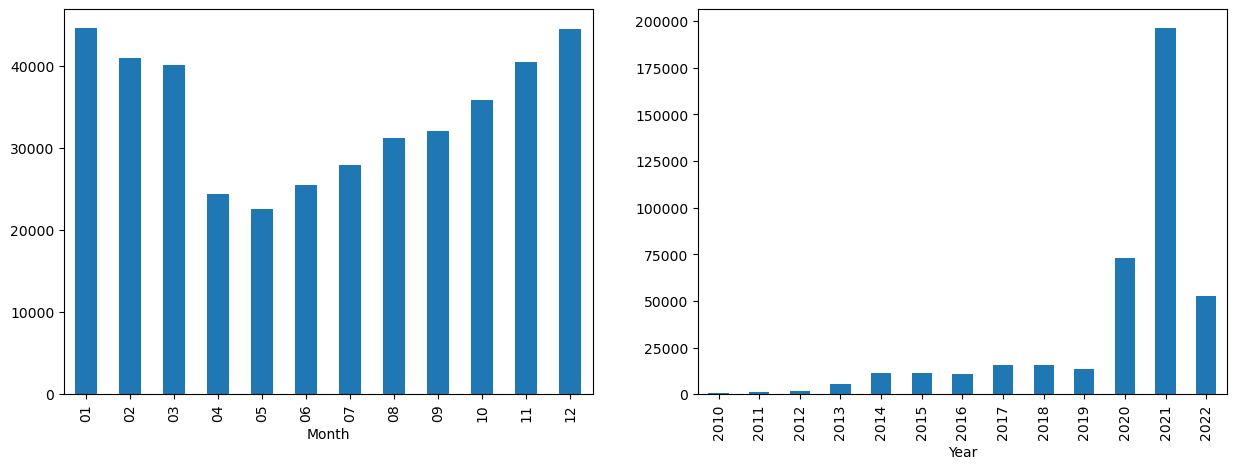

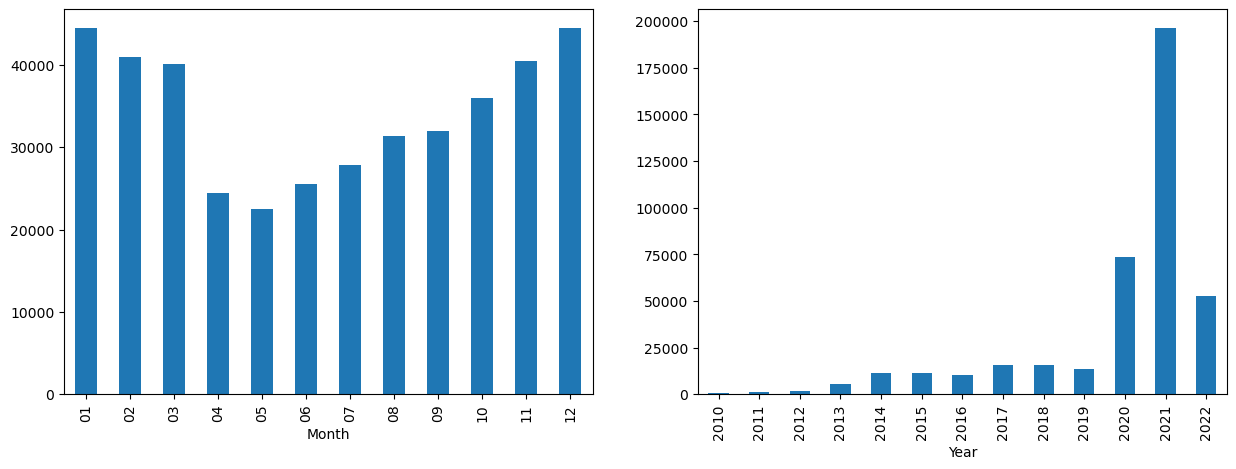

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df.groupby('Month').sum()['Open'].plot(kind="bar",ax=ax[0])
df.groupby('Year').sum()['Open'].plot(kind="bar",ax=ax[1])
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df.groupby('Month').sum()['Close'].plot(kind="bar",ax=ax[0])
df.groupby('Year').sum()['Close'].plot(kind="bar",ax=ax[1])
plt.show()

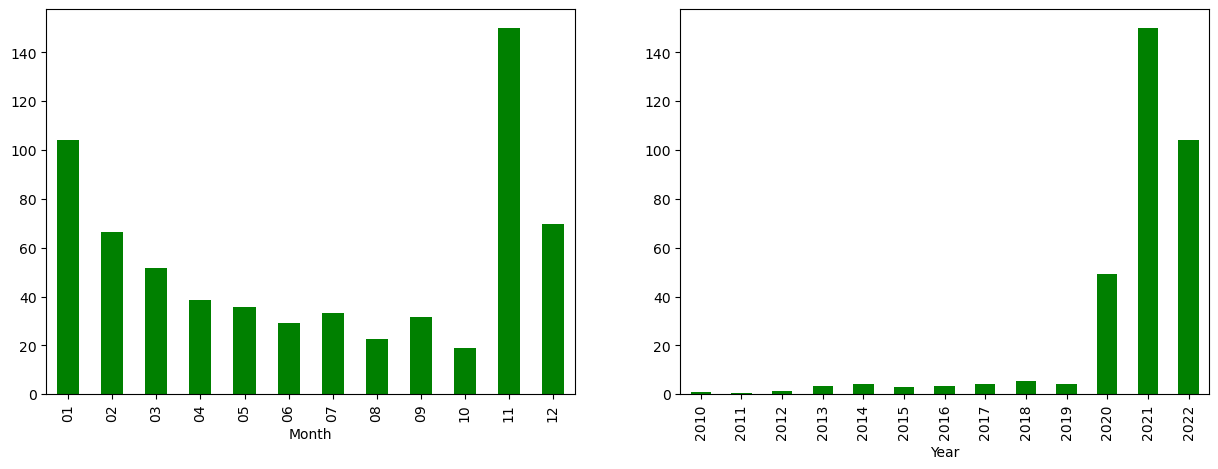

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df.groupby('Month').max()['Profit'].plot(kind="bar",ax=ax[0],color="green")
df.groupby('Year').max()['Profit'].plot(kind="bar",ax=ax[1],color="green")
plt.show()

In [55]:
df[df["Profit"]==df["Profit"].max()] 

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Profit
2862,2021-11-09,1173.599976,1174.5,1011.52002,1023.5,1023.5,59105800,2021,11,150.099976


In [56]:
df[df["Profit"]==df["Profit"].min()] 

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Profit
2935,2022-02-24,700.390015,802.47998,700.0,800.77002,800.77002,45107400,2022,02,-100.380005


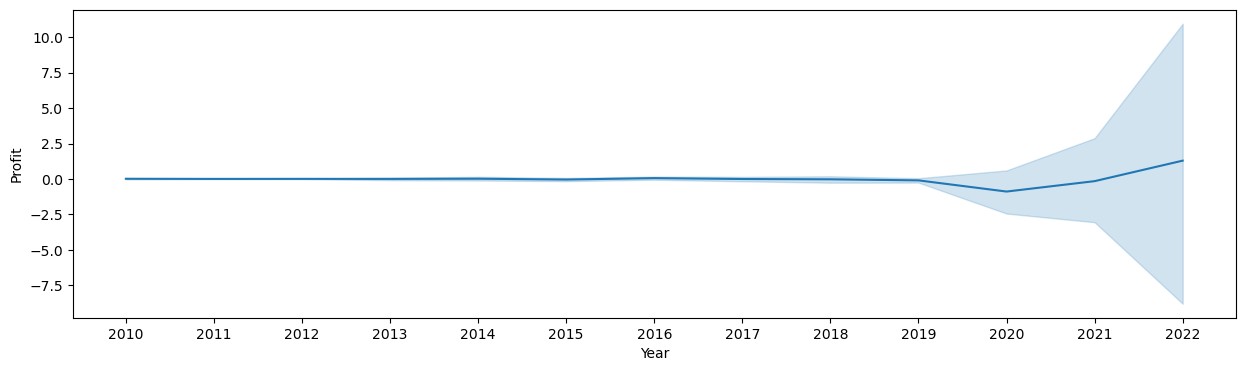

In [11]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Year', y='Profit', data=df, palette="husl")
plt.show()

1243.48999

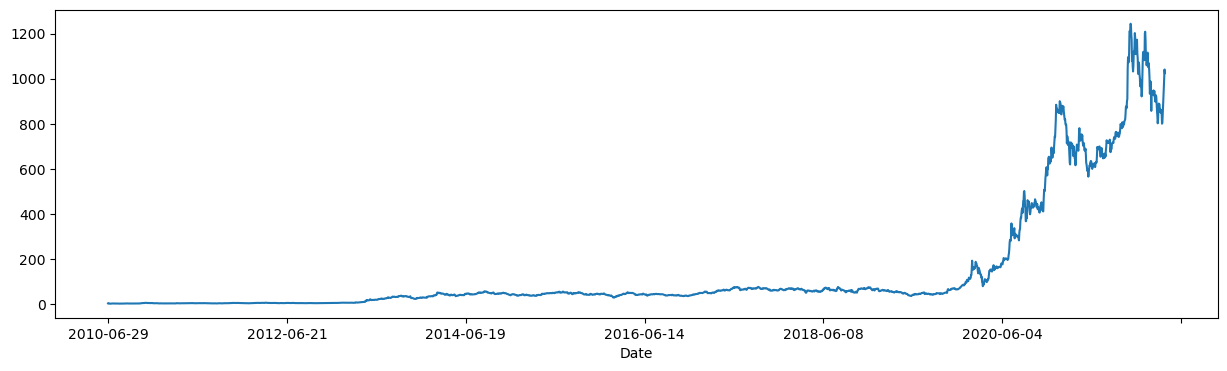

In [60]:
plt.figure(figsize=(15,4))
df.groupby('Date').sum()['High'].plot(kind="line")
df.groupby('Date').sum()['High'].max()

In [41]:
df[df["High"]==df["High"].max()]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Profit
2859,2021-11-04,1234.410034,1243.48999,1217.0,1229.910034,1229.910034,25397400,2021,11,4.5


2.996

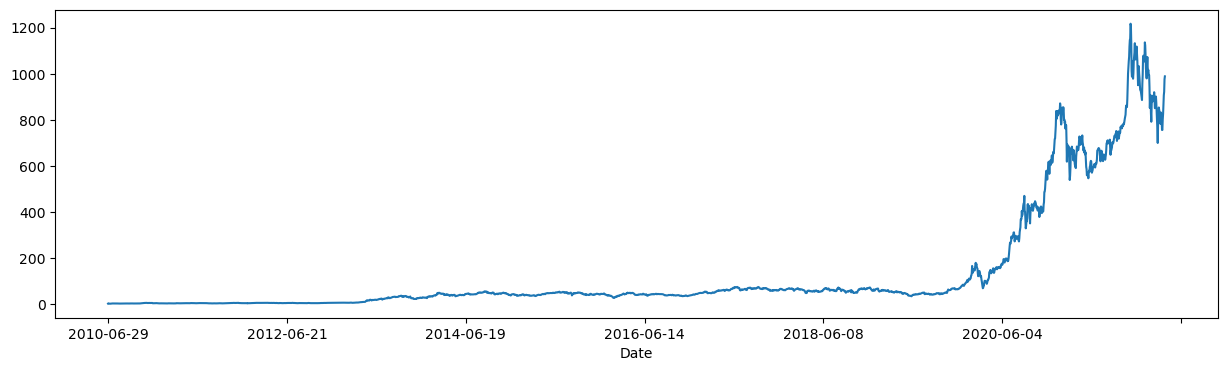

In [43]:
plt.figure(figsize=(15,4))
df.groupby('Date').sum()['Low'].plot(kind="line")
df.groupby('Date').sum()['Low'].min()

In [44]:
 df[df["Low"]==df["Low"].min()] 

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Profit
5,2010-07-07,3.28,3.326,2.996,3.16,3.16,34608500,2010,07,0.12


In [49]:
df[df["Low"]==df["Low"].max()] 

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Profit
2859,2021-11-04,1234.410034,1243.48999,1217.0,1229.910034,1229.910034,25397400,2021,11,4.5


1229.910034

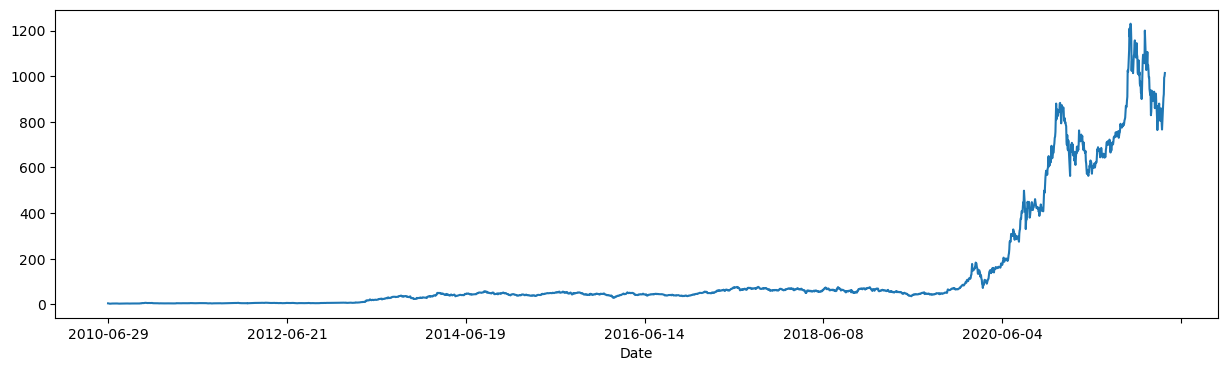

In [45]:
plt.figure(figsize=(15,4))
df.groupby('Date').sum()['Close'].plot(kind="line")
df.groupby('Date').sum()['Close'].max()

In [50]:
 df[df["Close"]==df["Close"].max()] 

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Profit
2859,2021-11-04,1234.410034,1243.48999,1217.0,1229.910034,1229.910034,25397400,2021,11,4.5


In [51]:
 df[df["Close"]==df["Close"].min()] 

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Profit
5,2010-07-07,3.28,3.326,2.996,3.16,3.16,34608500,2010,07,0.12


304694000

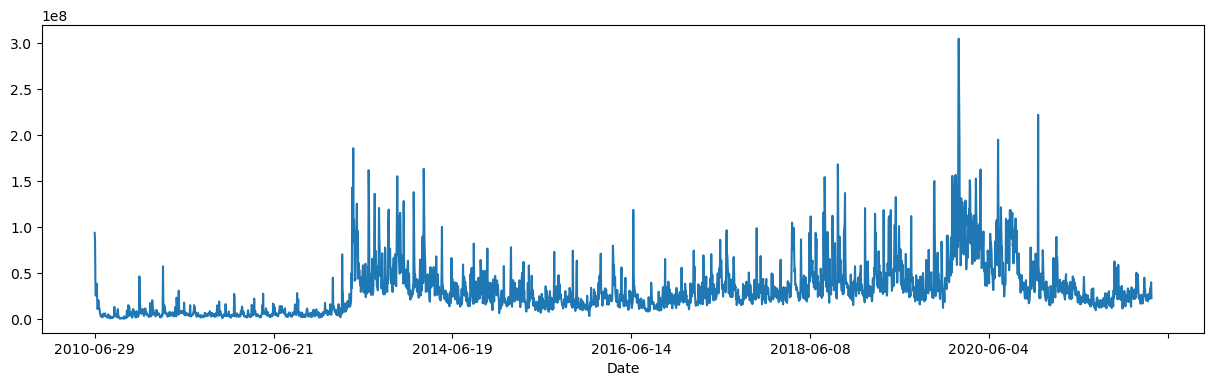

In [63]:
plt.figure(figsize=(15,4))
df.groupby('Date').sum()['Volume'].plot(kind="line")
df.groupby('Date').sum()['Volume'].max()

In [52]:
 df[df["Volume"]==df["Volume"].max()] 

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Profit
2416,2020-02-04,176.591995,193.798004,166.776001,177.412003,177.412003,304694000,2020,02,-0.820008


In [53]:
df[df["Volume"]==df["Volume"].min()] 

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Profit
82,2010-10-25,4.188,4.196,4.146,4.17,4.17,592500,2010,10,0.018


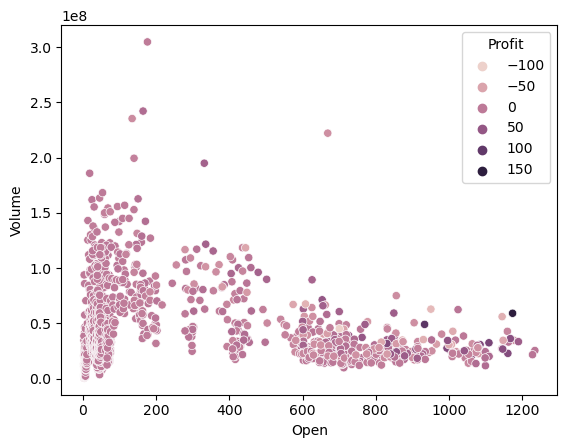

In [18]:
sns.scatterplot(data=df,x='Open',y="Volume",hue="Profit")
plt.show()

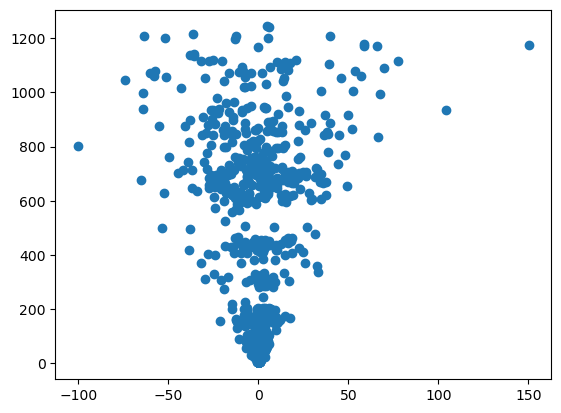

In [98]:
plt.scatter(df["Profit"],df['High']) 
plt.show()

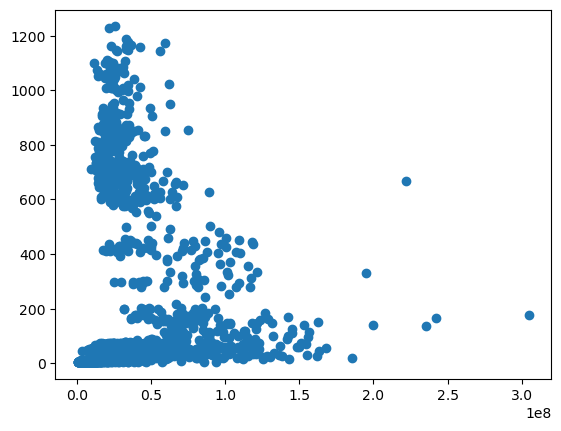

In [100]:
plt.scatter(df["Volume"],df['Open']) 
plt.show()

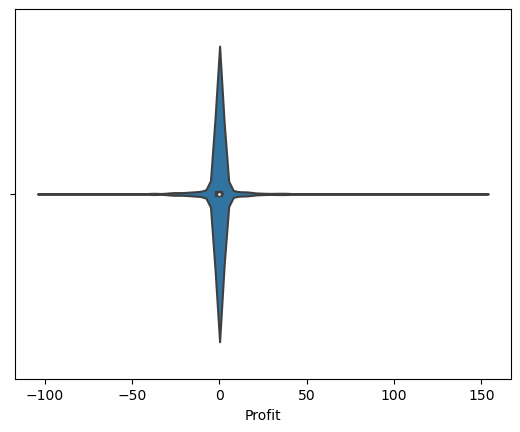

In [101]:
sns.violinplot(x='Profit',data = df)
plt.show()

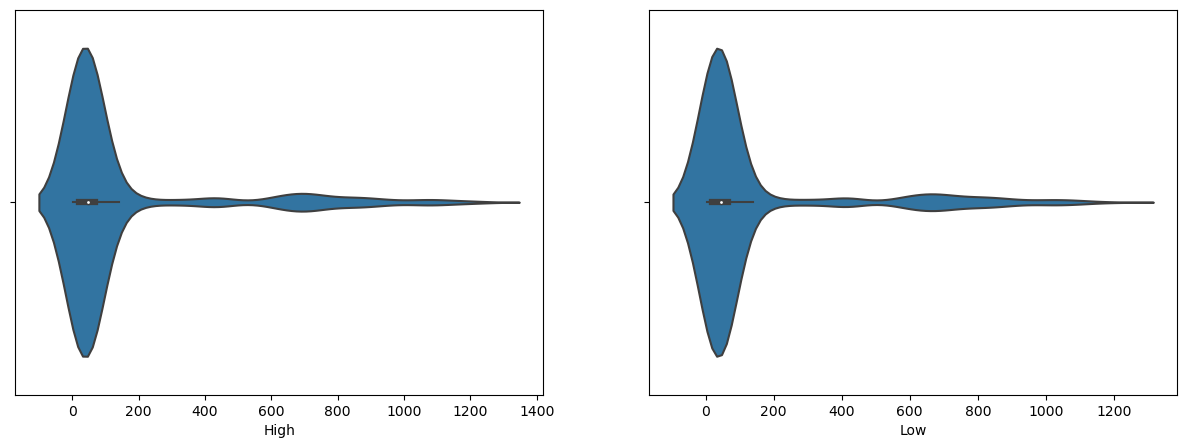

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(x='High',data = df,ax=ax[0])
sns.violinplot(x="Low",data=df,ax=ax[1])
plt.show()

# Multivariate Anaylsis

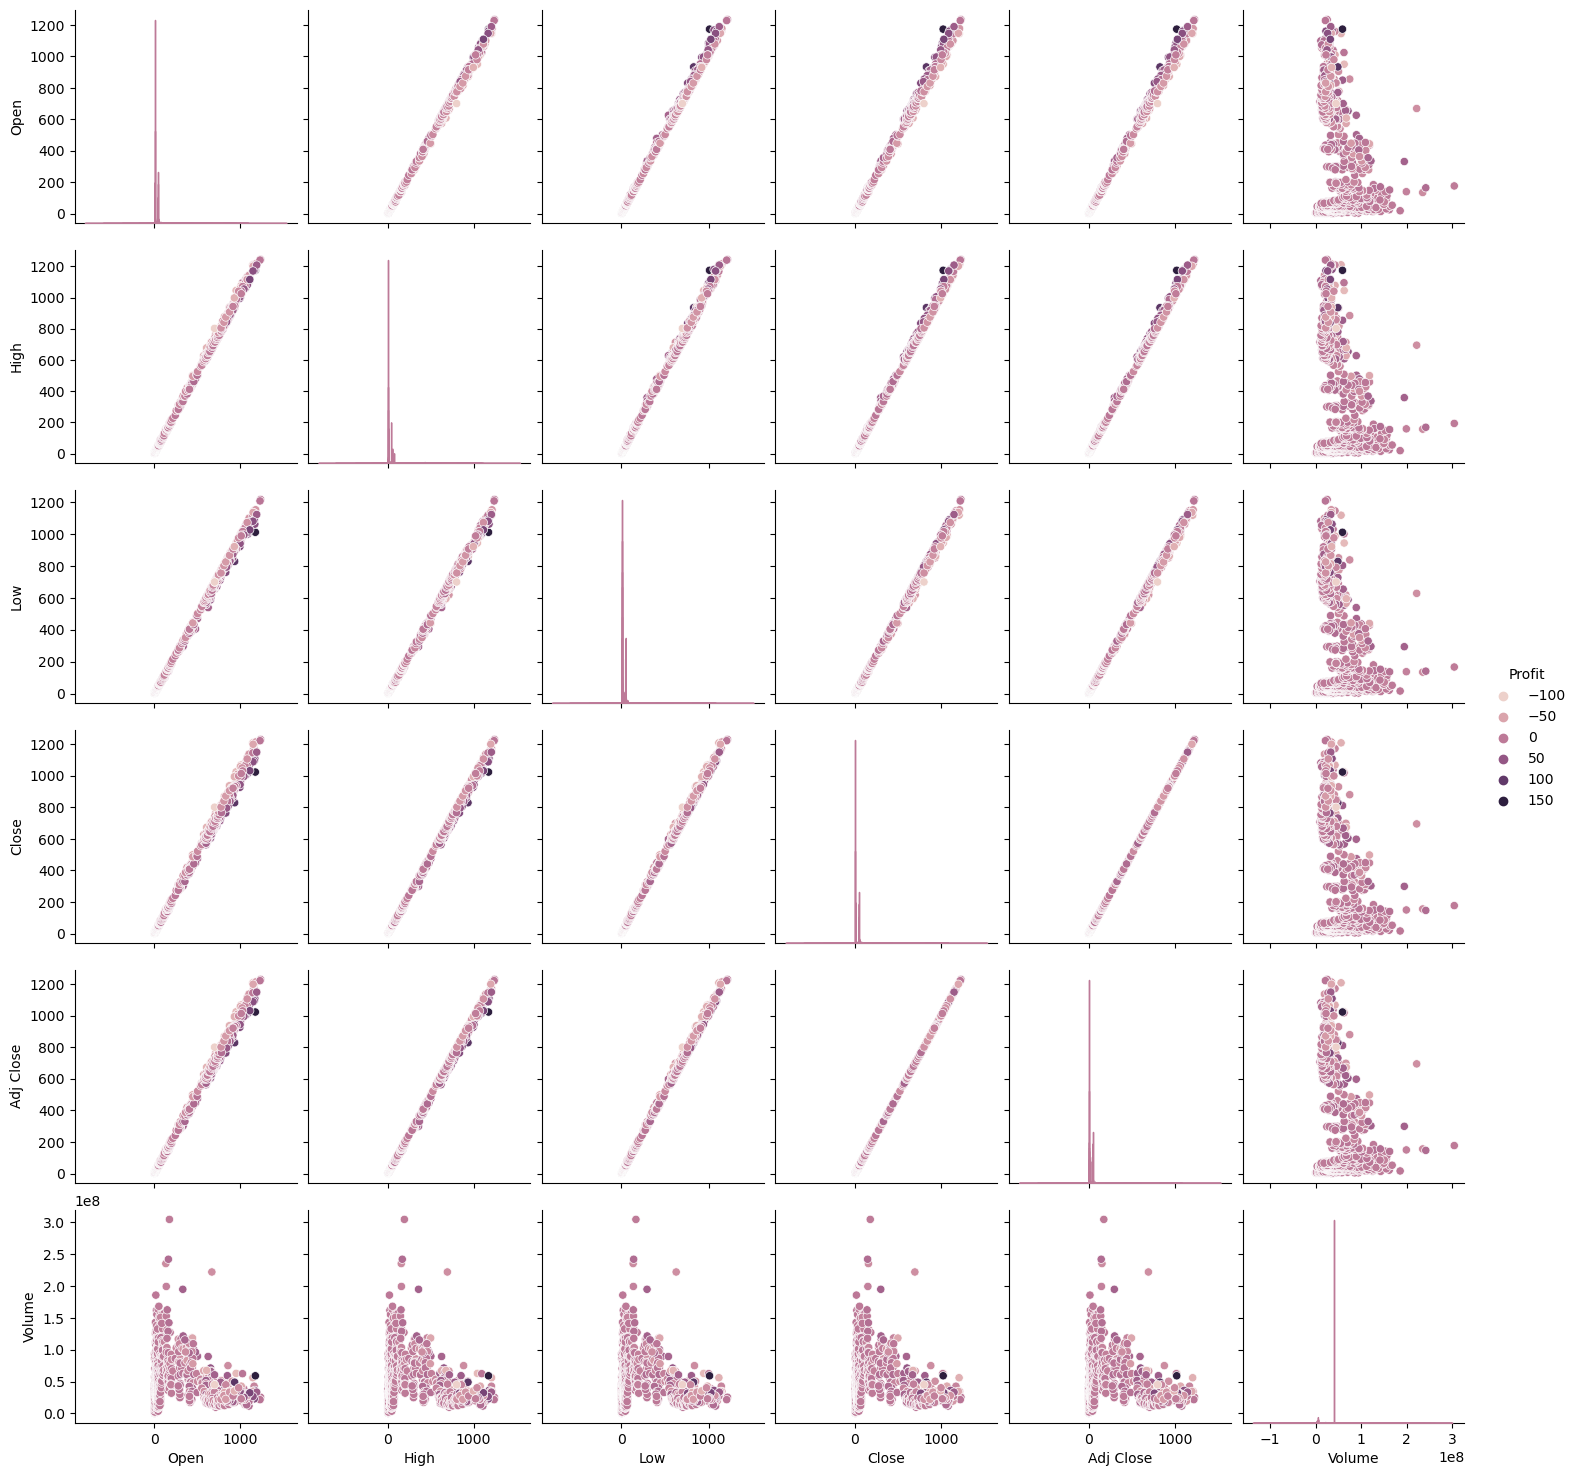

In [37]:
sns.pairplot(df,hue='Profit')
plt.show()

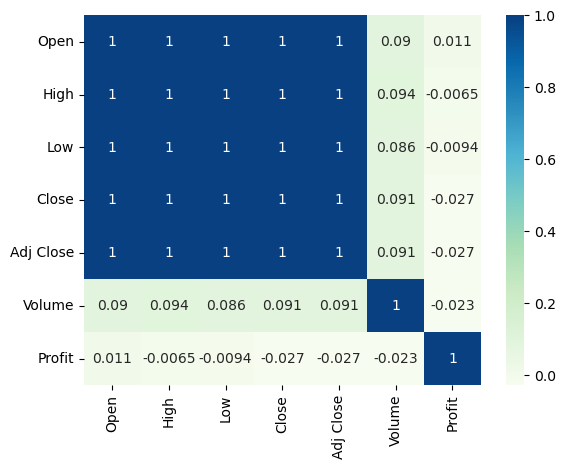

In [59]:
sns.heatmap(df.corr(),annot=True,cmap='GnBu')
plt.show()

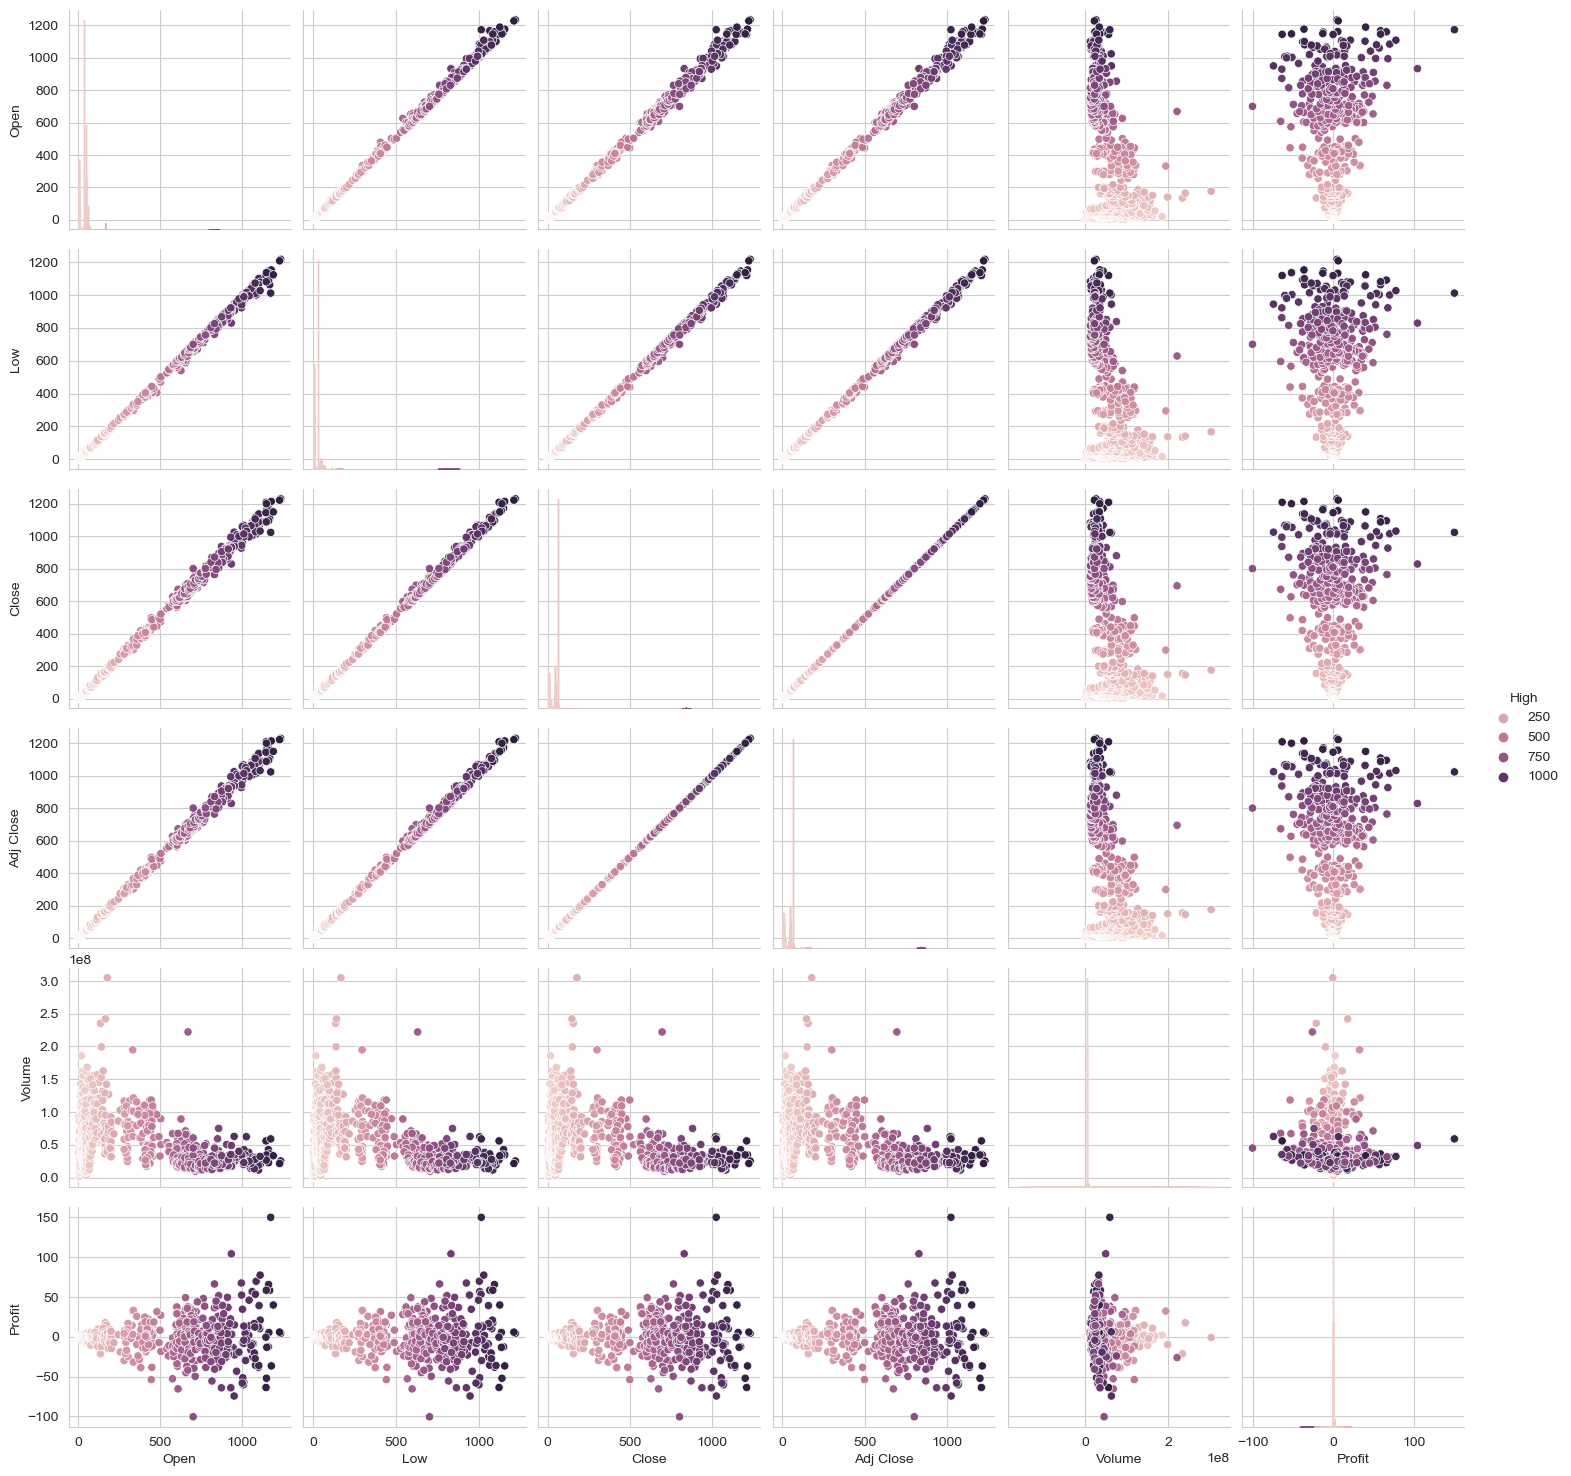

In [135]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue="High")
plt.show()

# Normal Distribution

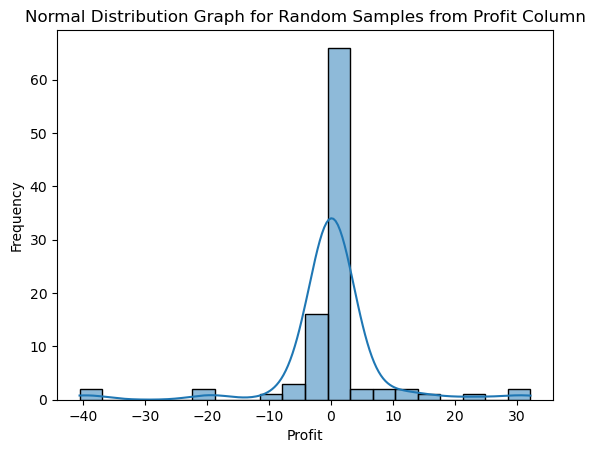

In [60]:
sample = df['Profit'].sample(n=100, random_state=42)
# Plot the normal distribution graph
sns.histplot(sample, bins=20,kde=True)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Normal Distribution Graph for Random Samples from Profit Column')
plt.show()

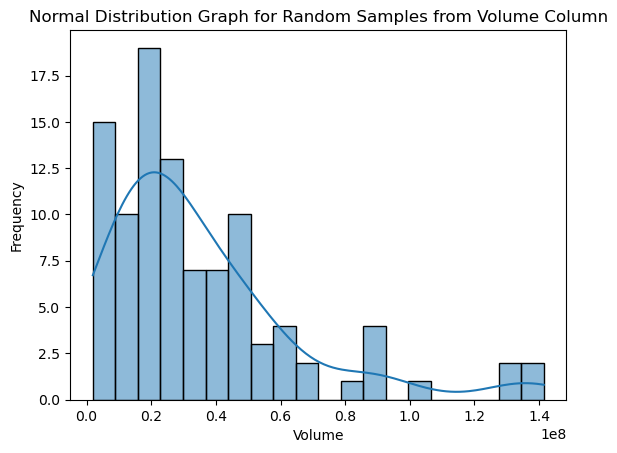

In [57]:
sample = df['Volume'].sample(n=100, random_state=42)
# Plot the normal distribution graph
sns.histplot(sample, bins=20,kde=True)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Normal Distribution Graph for Random Samples from Volume Column')
plt.show()

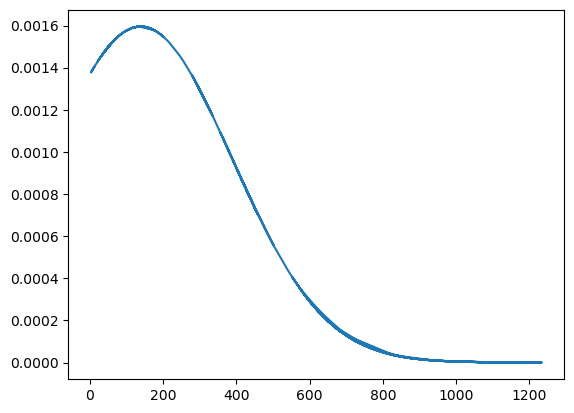

In [13]:
mean=df["Open"].mean()
sd=stats.stdev(df["Open"])
plt.plot(df['Open'],norm.pdf(df['Open'],mean,sd))
plt.show()

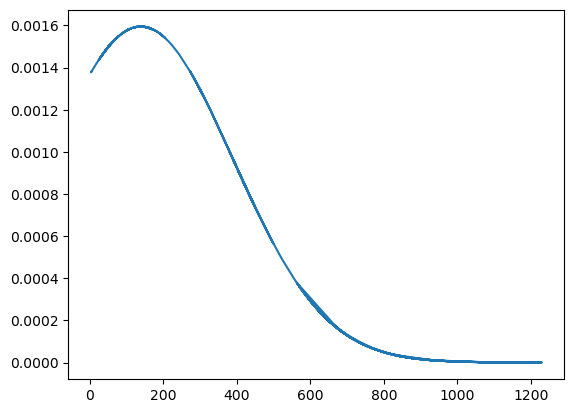

In [14]:
mean=df["Close"].mean()
sd=stats.stdev(df["Close"])
plt.plot(df['Close'],norm.pdf(df['Close'],mean,sd))
plt.show()

# Hypothesis Testing

# Chi-Square Testing

In [18]:
# Assuming 'df' is your DataFrame containing 'Open' and 'High' columns

# Create a contingency table to represent the observed frequencies
contingency_table = pd.crosstab(df['Open'], df['High'])

# Calculate the chi-squared statistic, p-value, degrees of freedom, and expected frequencies
chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(contingency_table)

# Print the results
print('Chi-squared statistic:', chi2_statistic)
print('Degrees of freedom:', degrees_of_freedom)
print('p-value:', p_value)

# Interpret the results
if p_value < 0.05:
    print('There is a significant difference in the distribution of rating levels across different sub-categories.')
else:
    print('There is no significant difference in the distribution of rating levels across different sub-categories.')

    

Chi-squared statistic: 7181796.720634913
Degrees of freedom: 7091565
p-value: 4.127010684134722e-126
There is a significant difference in the distribution of rating levels across different sub-categories.


# Anovo Testing

In [7]:
from scipy.stats import f_oneway

age_categories = df['Volume'].unique()

age_data = {category: df['Profit'][df['Year'] == category] for category in age_categories}

f_statistic, p_value = f_oneway(*age_data.values())

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in mean Profit among year.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in mean Profit among year.")


Fail to reject the null hypothesis. There is no statistically significant difference in mean Profit among year.


C:\Users\enosh\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


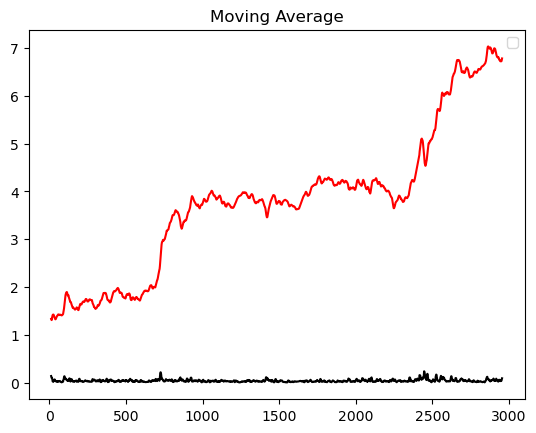

In [14]:
df_log = np.log(df['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.show()

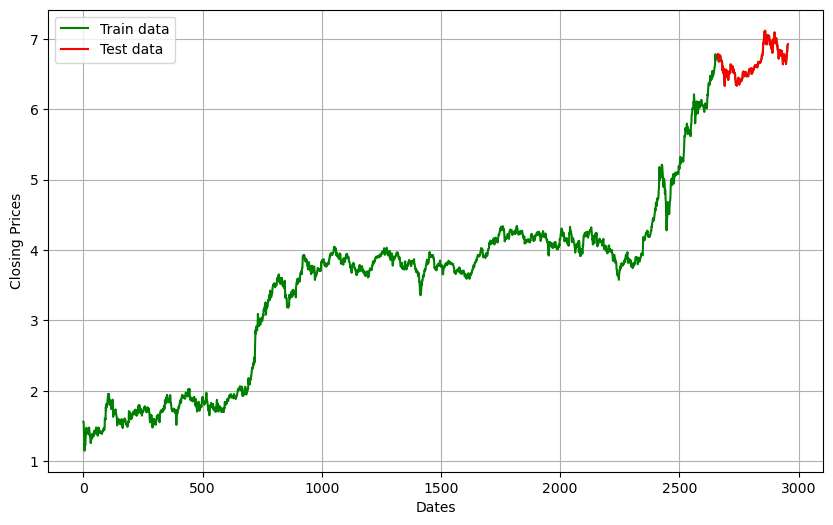

In [15]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()

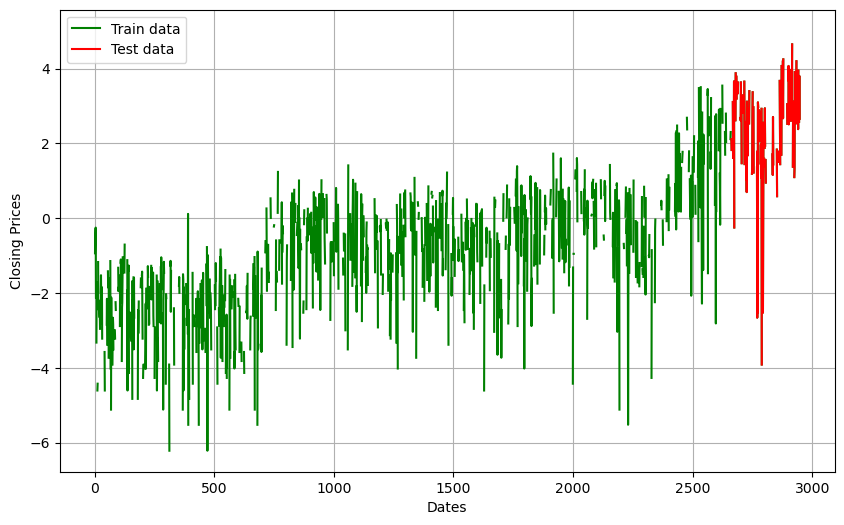

In [16]:
df_log = np.log(df['Profit'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()